Kaggle: Mushrooms

In this notebook we explore the "Mushrooms" kaggle challenge. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("mushrooms.csv")

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Do one-hit encoding
onehit = pd.get_dummies(df)
onehit.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


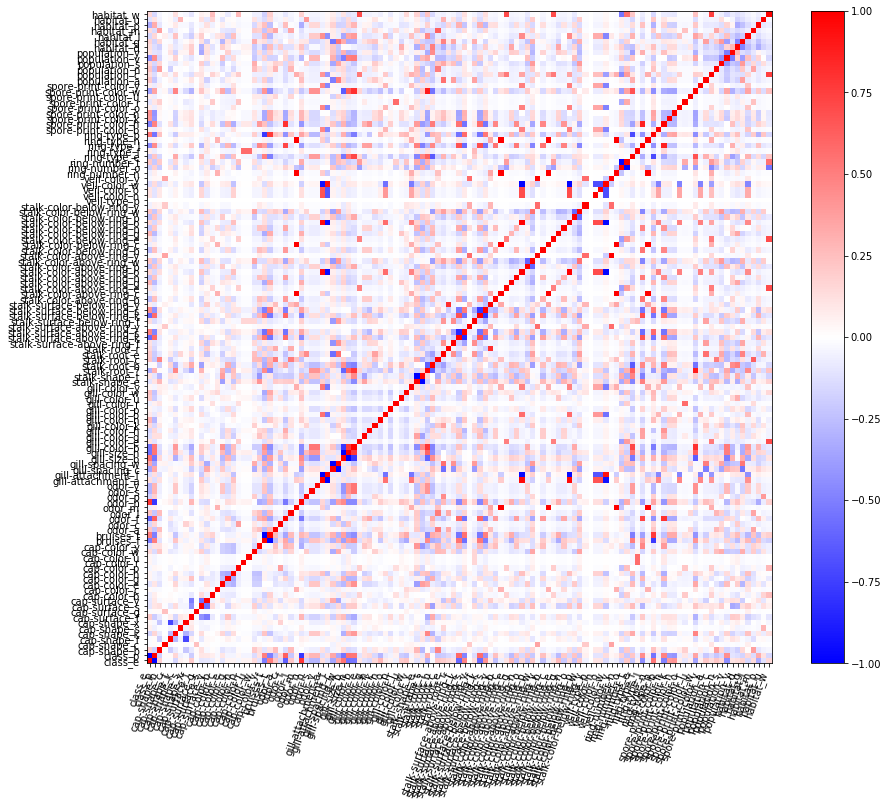

In [4]:
corrmat = onehit.corr()

fig,ax  = plt.subplots(figsize=(14,12))

opts    = {'cmap':plt.get_cmap("bwr"),'vmin':-1,'vmax':1}
heatmap = plt.pcolor(corrmat, **opts)
cbar    = plt.colorbar(heatmap, ax=ax)

labels = corrmat.columns.values

# shift location of ticks to center of the bins
ax.set_xticks(np.arange(len(labels))+0.5, minor=False);
ax.set_yticks(np.arange(len(labels))+0.5, minor=False);
ax.set_xticklabels(labels, fontsize=10, minor=False, ha='right', rotation=70);
ax.set_yticklabels(labels, fontsize=10, minor=False);

In [9]:
#Get train and test
train, test = train_test_split(onehit, test_size=0.33, random_state=14)
train.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
4801,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2351,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
430,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1414,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4153,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [17]:
features = train.columns.tolist()
features.remove('class_e')
features.remove('class_p')
print(features)

['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f', 'stalk-surf

In [33]:
X_train = train[features]
X_test = test[features]
Y_train = train['class_e']
Y_test = test['class_e']

print(X_train.head)

<bound method NDFrame.head of       cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
4801            0            0            0            0            0   
2351            0            0            1            0            0   
430             0            0            0            0            0   
1414            0            0            1            0            0   
4153            0            0            0            0            0   
...           ...          ...          ...          ...          ...   
6471            0            0            1            0            0   
2454            0            0            0            0            0   
1292            0            0            0            0            0   
5464            0            0            1            0            0   
2667            0            0            0            0            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
4801        

In [36]:
xgb = xgboost.XGBClassifier(n_jobs=-1, n_estimators=20).fit(X_train,Y_train)

In [37]:
probs = xgb.predict_proba(X_test)

In [44]:
preds = probs[:,1]
print(preds)

[0.9332253  0.0661397  0.12629813 ... 0.0661397  0.9332253  0.0661397 ]


In [52]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(Y_test, preds)
roc_auc = sklearn.metrics.auc(fpr, tpr)
print(roc_auc)

0.9998827117053718


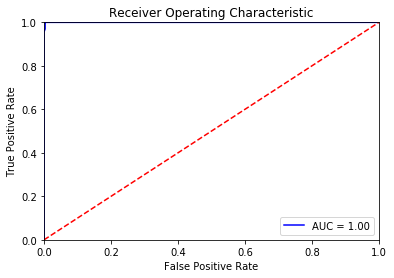

In [51]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()